##### Dataset

In [2]:
# iris.csv
# Location: https://mitu.co.in/dataset

##### Import the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##### Load the data

In [7]:
df = sns.load_dataset('iris')

In [8]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


##### Separate the input and output variables

In [10]:
# input data
x = df.drop('species', axis = 1)

# output data
y = df['species']

##### Explore the data

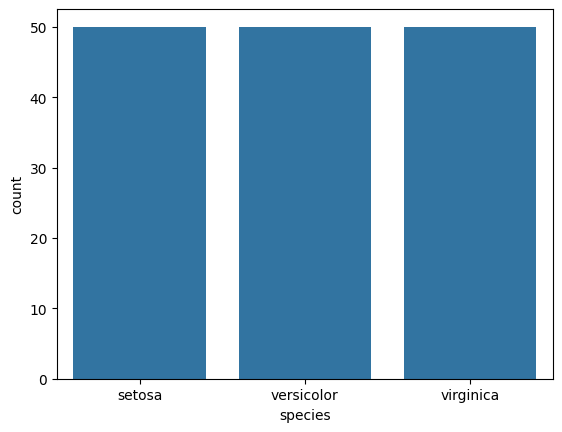

In [12]:
sns.countplot(x = y);

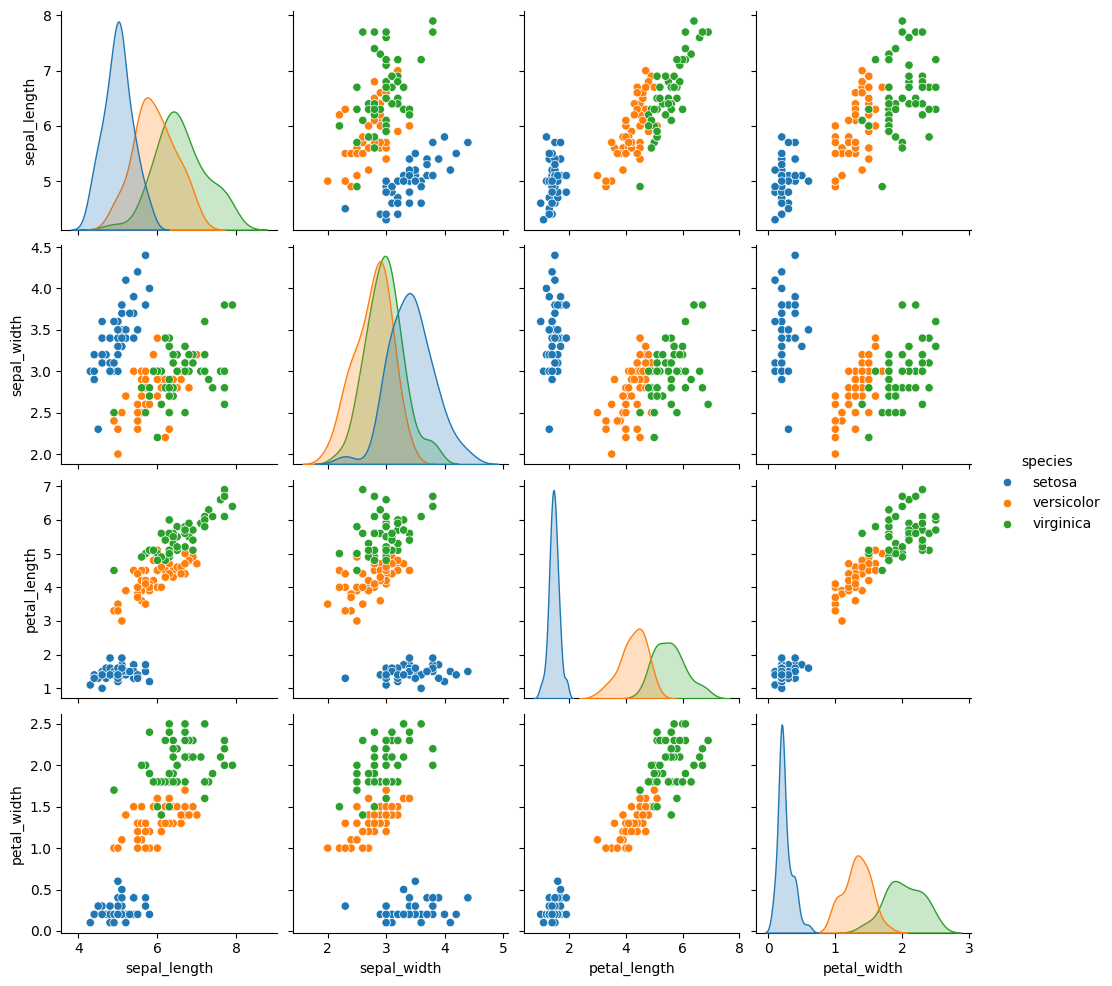

In [14]:
sns.pairplot(df, hue='species');

In [15]:
x.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### Normalize the data

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [18]:
x_new = pd.DataFrame(x_scaled, columns=x.columns)

In [19]:
x_new

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [20]:
x_new.shape

(150, 4)

##### Cross-Validation

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_new, y, random_state=0)

In [23]:
x_train.shape, x_test.shape

((112, 4), (38, 4))

##### Build the model

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)

In [27]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

##### Performance Evaluation

In [30]:
y_pred = knn.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

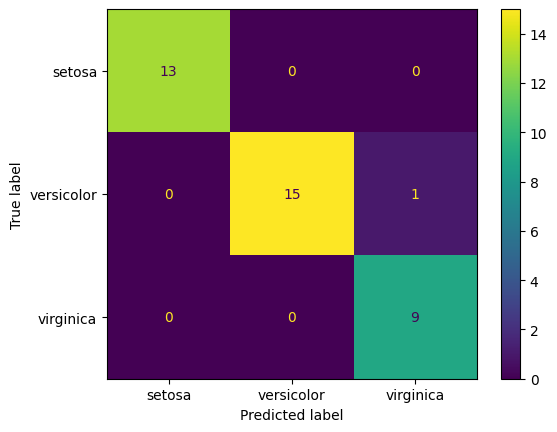

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [33]:
accuracy_score(y_test, y_pred)

0.9736842105263158

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [37]:
np.mean(y_test != y_pred)

0.02631578947368421

##### Deciding value of K

In [39]:
error = []
for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error.append(np.mean(y_test != y_pred))

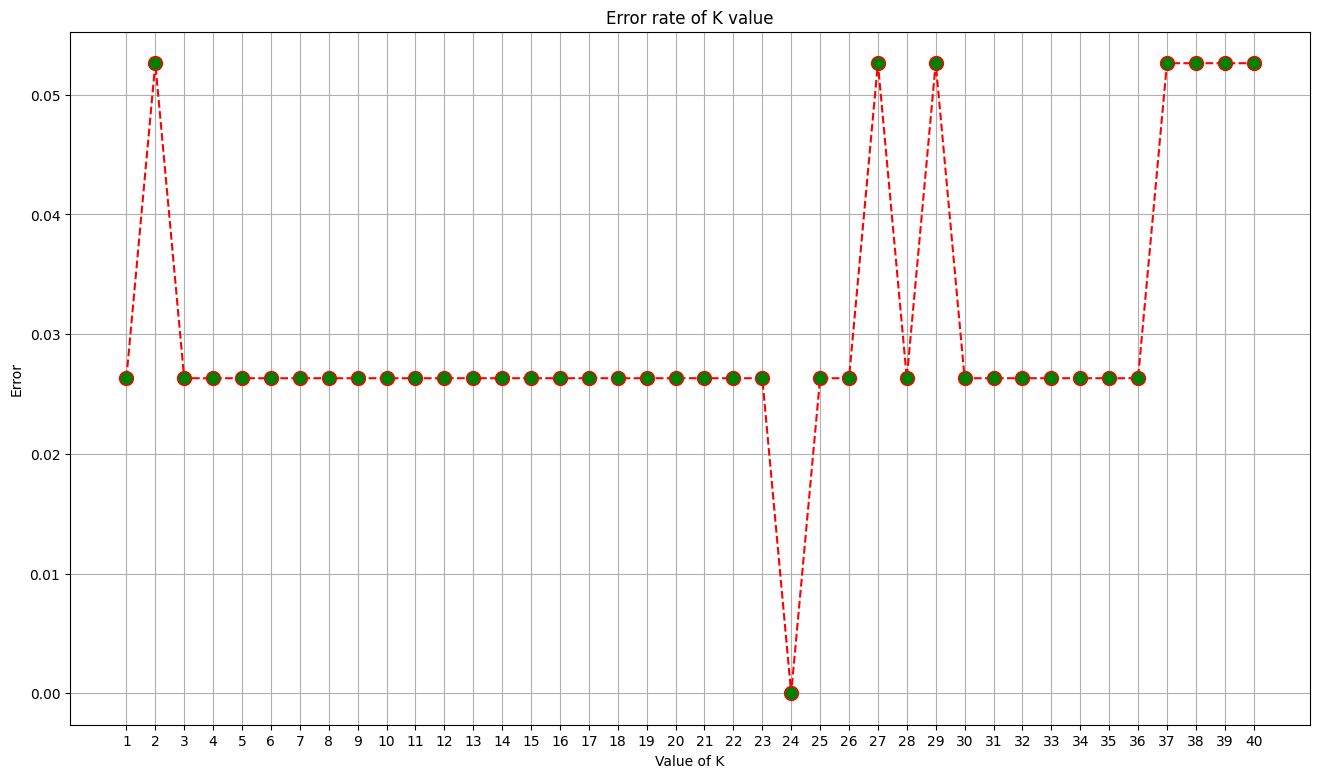

In [44]:
plt.figure(figsize=(16,9))
plt.title('Error rate of K value')
plt.xlabel('Value of K')
plt.ylabel('Error')
plt.grid()
plt.xticks(range(1,41))
plt.plot(range(1,41), error, marker='o', color = 'red', ms=10, ls='--', mfc='g')

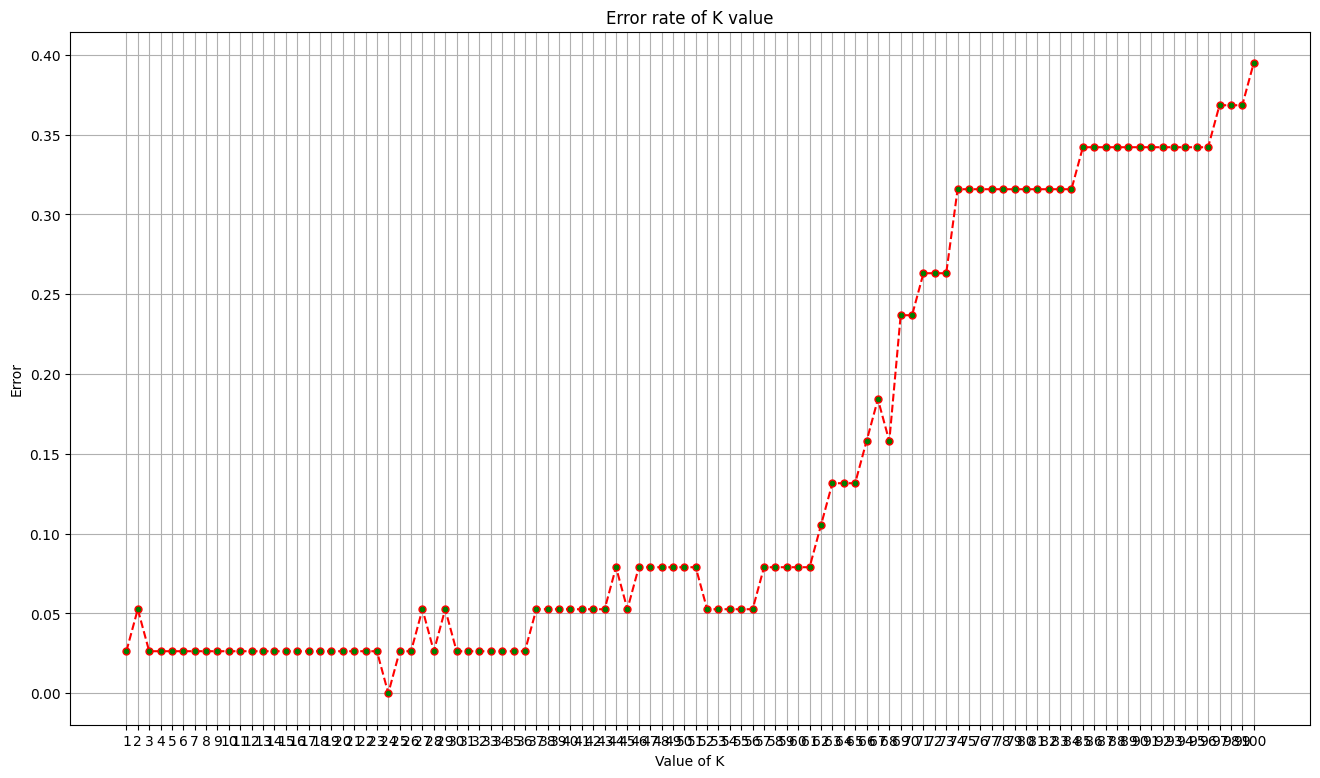

In [46]:
error = []
for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error.append(np.mean(y_test != y_pred))

plt.figure(figsize=(16,9))
plt.title('Error rate of K value')
plt.xlabel('Value of K')
plt.ylabel('Error')
plt.grid()
plt.xticks(range(1,101))
plt.plot(range(1,101), error, marker='o', color = 'red', ms=5, ls='--', mfc='g')

In [47]:
knn = KNeighborsClassifier(n_neighbors=24)

In [48]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=24)

In [49]:
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

In [50]:
newdf = pd.DataFrame(data=[[7.2, 3.6, 6.1, 2.5],
                           [4.4, 3.0, 1.3, 0.2],
                           [6.1, 2.8, 4.7, 1.2]], columns=x.columns)

In [51]:
newdf

,sepal_length,sepal_width,petal_length,petal_width
0,7.2,3.6,6.1,2.5
1,4.4,3.0,1.3,0.2
2,6.1,2.8,4.7,1.2


In [52]:
knn.predict(newdf)

array(['virginica', 'virginica', 'virginica'], dtype=object)

In [53]:
scaler.transform(newdf)

array([[0.80555556, 0.66666667, 0.86440678, 1.        ],
       [0.02777778, 0.41666667, 0.05084746, 0.04166667],
       [0.5       , 0.33333333, 0.62711864, 0.45833333]])

In [54]:
knn.predict(scaler.transform(newdf))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['virginica', 'setosa', 'versicolor'], dtype=object)